In [1]:
import torch

import torch.nn as nn
import torch.nn.functional as F

from torchvision.datasets import MNIST
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader, Subset, random_split

import torchvision.transforms as transforms

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import random

import os

In [2]:
from train import *

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"==>> device: {device}")

==>> device: cuda


In [4]:
def seed_everything(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if use multi-GPU
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # cudnn은 conv 과정에서 여러 알고리즘의 benchmark를 수행해
    # 가장 빠른 알고리즘 선정해 수행
    # -> True로 두면 시행마다 다른 알고리즘이 선택되어 결과가 달라질 수 있다
    # https://tempdev.tistory.com/28
    np.random.seed(seed)
    random.seed(seed)


seed_everything(42)

In [5]:
hp = {}

hp["device"] = device
# hp["device"] = "cpu"
# cpu로 하면 에러메시지가 더 자세해서 디버깅에 용이
hp["epochs"] = 1000
hp["batch_size"] = 100
hp["wandb"] = "online"
# hp["wandb"] = "disabled"

In [6]:
hp["encoder"] = EncoderExp5(28 * 28, 10, tau=0.5).to(hp["device"])
hp["decoder"] = Decoder(20, 28 * 28).to(hp["device"])
hp["discriminator_label"] = Discriminator5_Label(10).to(hp["device"])
hp["discriminator_style"] = Discriminator5_Style(10).to(hp["device"])
params = [hp["encoder"].parameters(), hp["decoder"].parameters()]
hp["optim_ae"] = SGD(itertools.chain(*params), lr=0.01)
hp["scheduler_ae"] = MultiStepLR(hp["optim_ae"], milestones=[50, 500], gamma=0.1)
hp["optim_en"] = SGD(hp["encoder"].parameters(), lr=0.1)
hp["scheduler_en"] = MultiStepLR(hp["optim_en"], milestones=[50, 500], gamma=0.1)
hp["optim_en_semi"] = SGD(hp["encoder"].parameters(), lr=0.1)
hp["scheduler_en_semi"] = MultiStepLR(hp["optim_en_semi"], milestones=[50, 500], gamma=0.1)
hp["optim_dc_l"] = SGD(hp["discriminator_label"].parameters(), lr=0.1)
hp["scheduler_dc_l"] = MultiStepLR(hp["optim_dc_l"], milestones=[50, 500], gamma=0.1)
hp["optim_dc_s"] = SGD(hp["discriminator_style"].parameters(), lr=0.1)
hp["scheduler_dc_s"] = MultiStepLR(hp["optim_dc_s"], milestones=[50, 500], gamma=0.1)

In [7]:
hp["run_name"] = "AAE_0224_exp5_tau=0.5"

encoder, decoder, discriminator_l, discriminator_s = train5(hp)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: pao-kim-si-woong. Use `wandb login --relogin` to force relogin


Epoch[0/1000](1/1) || r_loss_sv 0.9749 d_l_loss_sv 1.397 d_s_loss_sv 1.408 g_loss_sv -2.889 c_loss_sv 2.324
sv_acc 10.0%
Epoch[0/1000](599/599) || r_loss_unsv 0.4492 d_l_loss_unsv 0.881 d_s_loss_unsv 1.469 g_loss_unsv -2.253
unsv_acc 12.91%
Calculating validation results...
[test] loss_r: 0.28, loss_d_l:  1.7, loss_d_s:  1.4, loss_g: -3.1, loss_c:  2.3
test_acc 17.61%
Epoch[1/1000](1/1) || r_loss_sv 0.2768 d_l_loss_sv 0.7408 d_s_loss_sv 1.458 g_loss_sv -2.162 c_loss_sv 2.292
sv_acc 16.0%
Epoch[1/1000](599/599) || r_loss_unsv 0.249 d_l_loss_unsv 0.722 d_s_loss_unsv 1.461 g_loss_unsv -2.058
unsv_acc 15.78%
Calculating validation results...
[test] loss_r: 0.23, loss_d_l:  2.3, loss_d_s:  1.5, loss_g: -3.8, loss_c:  2.3
test_acc 17.68%
Epoch[2/1000](1/1) || r_loss_sv 0.2227 d_l_loss_sv 0.4022 d_s_loss_sv 1.452 g_loss_sv -1.746 c_loss_sv 2.33
sv_acc 13.0%
Epoch[2/1000](599/599) || r_loss_unsv 0.2187 d_l_loss_unsv 0.5857 d_s_loss_unsv 1.459 g_loss_unsv -1.905
unsv_acc 15.88%
Calculating vali

Epoch[10/1000](1/1) || r_loss_sv 0.1798 d_l_loss_sv 0.1932 d_s_loss_sv 1.436 g_loss_sv -1.557 c_loss_sv 2.226
sv_acc 23.0%
Epoch[10/1000](599/599) || r_loss_unsv 0.1873 d_l_loss_unsv 0.3499 d_s_loss_unsv 1.45 g_loss_unsv -1.638
unsv_acc 20.93%
Calculating validation results...
[test] loss_r: 0.19, loss_d_l:  2.1, loss_d_s:  1.5, loss_g: -3.6, loss_c:  2.3
test_acc 20.24%
Epoch[11/1000](1/1) || r_loss_sv 0.1902 d_l_loss_sv 0.04335 d_s_loss_sv 1.464 g_loss_sv -1.639 c_loss_sv 2.266
sv_acc 19.0%
Epoch[11/1000](599/599) || r_loss_unsv 0.1827 d_l_loss_unsv 0.3438 d_s_loss_unsv 1.448 g_loss_unsv -1.64
unsv_acc 17.63%
Calculating validation results...
[test] loss_r: 0.19, loss_d_l:  2.1, loss_d_s:  1.5, loss_g: -3.6, loss_c:  2.3
test_acc 20.82%
Epoch[12/1000](1/1) || r_loss_sv 0.1863 d_l_loss_sv 0.04772 d_s_loss_sv 1.451 g_loss_sv -2.01 c_loss_sv 2.279
sv_acc 18.0%
Epoch[12/1000](599/599) || r_loss_unsv 0.1782 d_l_loss_unsv 0.434 d_s_loss_unsv 1.446 g_loss_unsv -1.696
unsv_acc 19.5%
Calculat

Epoch[20/1000](1/1) || r_loss_sv 0.1601 d_l_loss_sv 0.8624 d_s_loss_sv 1.445 g_loss_sv -1.729 c_loss_sv 2.249
sv_acc 21.0%
Epoch[20/1000](599/599) || r_loss_unsv 0.1668 d_l_loss_unsv 0.4395 d_s_loss_unsv 1.437 g_loss_unsv -1.691
unsv_acc 17.77%
Calculating validation results...
[test] loss_r: 0.17, loss_d_l:  2.5, loss_d_s:  1.5, loss_g: -4.0, loss_c:  2.3
test_acc 14.38%
Epoch[21/1000](1/1) || r_loss_sv 0.1717 d_l_loss_sv 0.009549 d_s_loss_sv 1.451 g_loss_sv -1.432 c_loss_sv 2.304
sv_acc 16.0%
Epoch[21/1000](599/599) || r_loss_unsv 0.1787 d_l_loss_unsv 0.111 d_s_loss_unsv 1.444 g_loss_unsv -1.492
unsv_acc 13.83%
Calculating validation results...
[test] loss_r: 0.18, loss_d_l:  2.0, loss_d_s:  1.5, loss_g: -3.5, loss_c:  2.3
test_acc 13.08%
Epoch[22/1000](1/1) || r_loss_sv 0.1768 d_l_loss_sv 0.005827 d_s_loss_sv 1.452 g_loss_sv -1.482 c_loss_sv 2.314
sv_acc 15.0%
Epoch[22/1000](599/599) || r_loss_unsv 0.1805 d_l_loss_unsv 0.09519 d_s_loss_unsv 1.442 g_loss_unsv -1.477
unsv_acc 15.02%
C

Epoch[30/1000](1/1) || r_loss_sv 0.1554 d_l_loss_sv 0.02709 d_s_loss_sv 1.439 g_loss_sv -1.451 c_loss_sv 2.282
sv_acc 18.0%
Epoch[30/1000](599/599) || r_loss_unsv 0.1544 d_l_loss_unsv 0.5539 d_s_loss_unsv 1.426 g_loss_unsv -1.743
unsv_acc 16.59%
Calculating validation results...
[test] loss_r: 0.15, loss_d_l:  2.5, loss_d_s:  1.4, loss_g: -3.9, loss_c:  2.3
test_acc 16.07%
Epoch[31/1000](1/1) || r_loss_sv 0.1514 d_l_loss_sv 0.2346 d_s_loss_sv 1.43 g_loss_sv -1.753 c_loss_sv 2.296
sv_acc 16.0%
Epoch[31/1000](599/599) || r_loss_unsv 0.1537 d_l_loss_unsv 0.5582 d_s_loss_unsv 1.426 g_loss_unsv -1.703
unsv_acc 17.2%
Calculating validation results...
[test] loss_r: 0.15, loss_d_l:  2.7, loss_d_s:  1.4, loss_g: -4.1, loss_c:  2.3
test_acc 16.5%
Epoch[32/1000](1/1) || r_loss_sv 0.1495 d_l_loss_sv 0.08438 d_s_loss_sv 1.425 g_loss_sv -1.419 c_loss_sv 2.26
sv_acc 20.0%
Epoch[32/1000](599/599) || r_loss_unsv 0.1506 d_l_loss_unsv 0.7604 d_s_loss_unsv 1.423 g_loss_unsv -1.864
unsv_acc 16.49%
Calcula

Epoch[40/1000](1/1) || r_loss_sv 0.144 d_l_loss_sv 0.741 d_s_loss_sv 1.401 g_loss_sv -1.509 c_loss_sv 2.281
sv_acc 18.0%
Epoch[40/1000](599/599) || r_loss_unsv 0.1487 d_l_loss_unsv 0.4826 d_s_loss_unsv 1.415 g_loss_unsv -1.66
unsv_acc 16.17%
Calculating validation results...
[test] loss_r: 0.14, loss_d_l:  3.3, loss_d_s:  1.4, loss_g: -4.7, loss_c:  2.3
test_acc 17.57%
Epoch[41/1000](1/1) || r_loss_sv 0.1427 d_l_loss_sv 0.00405 d_s_loss_sv 1.412 g_loss_sv -1.402 c_loss_sv 2.311
sv_acc 15.0%
Epoch[41/1000](599/599) || r_loss_unsv 0.1475 d_l_loss_unsv 0.5188 d_s_loss_unsv 1.413 g_loss_unsv -1.69
unsv_acc 17.42%
Calculating validation results...
[test] loss_r: 0.15, loss_d_l:  2.3, loss_d_s:  1.4, loss_g: -3.7, loss_c:  2.3
test_acc 17.75%
Epoch[42/1000](1/1) || r_loss_sv 0.1445 d_l_loss_sv 0.001905 d_s_loss_sv 1.415 g_loss_sv -1.383 c_loss_sv 2.303
sv_acc 16.0%
Epoch[42/1000](599/599) || r_loss_unsv 0.1455 d_l_loss_unsv 0.5927 d_s_loss_unsv 1.411 g_loss_unsv -1.68
unsv_acc 17.28%
Calcula

Epoch[50/1000](1/1) || r_loss_sv 0.1319 d_l_loss_sv 4.089 d_s_loss_sv 1.395 g_loss_sv -1.615 c_loss_sv 2.29
sv_acc 17.0%
Epoch[50/1000](599/599) || r_loss_unsv 0.1364 d_l_loss_unsv 0.8606 d_s_loss_unsv 1.383 g_loss_unsv -2.101
unsv_acc 15.58%
Calculating validation results...
[test] loss_r: 0.13, loss_d_l:  2.3, loss_d_s:  1.4, loss_g: -3.7, loss_c:  2.3
test_acc 15.43%
Epoch[51/1000](1/1) || r_loss_sv 0.1338 d_l_loss_sv 2.508 d_s_loss_sv 1.38 g_loss_sv -2.162 c_loss_sv 2.291
sv_acc 17.0%
Epoch[51/1000](599/599) || r_loss_unsv 0.1373 d_l_loss_unsv 0.7212 d_s_loss_unsv 1.383 g_loss_unsv -2.025
unsv_acc 15.43%
Calculating validation results...
[test] loss_r: 0.14, loss_d_l:  3.0, loss_d_s:  1.4, loss_g: -4.4, loss_c:  2.3
test_acc 15.26%
Epoch[52/1000](1/1) || r_loss_sv 0.1352 d_l_loss_sv 0.1483 d_s_loss_sv 1.386 g_loss_sv -3.057 c_loss_sv 2.29
sv_acc 17.0%
Epoch[52/1000](599/599) || r_loss_unsv 0.1382 d_l_loss_unsv 0.7359 d_s_loss_unsv 1.383 g_loss_unsv -2.044
unsv_acc 15.42%
Calculatin

Epoch[60/1000](1/1) || r_loss_sv 0.1344 d_l_loss_sv 1.288 d_s_loss_sv 1.389 g_loss_sv -1.459 c_loss_sv 2.29
sv_acc 17.0%
Epoch[60/1000](599/599) || r_loss_unsv 0.1374 d_l_loss_unsv 0.6275 d_s_loss_unsv 1.382 g_loss_unsv -1.977
unsv_acc 15.53%
Calculating validation results...
[test] loss_r: 0.13, loss_d_l:  2.2, loss_d_s:  1.4, loss_g: -3.6, loss_c:  2.3
test_acc 15.75%
Epoch[61/1000](1/1) || r_loss_sv 0.1357 d_l_loss_sv 0.06972 d_s_loss_sv 1.385 g_loss_sv -3.321 c_loss_sv 2.291
sv_acc 17.0%
Epoch[61/1000](599/599) || r_loss_unsv 0.1373 d_l_loss_unsv 0.6296 d_s_loss_unsv 1.382 g_loss_unsv -1.913
unsv_acc 15.57%
Calculating validation results...
[test] loss_r: 0.13, loss_d_l:  4.6, loss_d_s:  1.4, loss_g: -6.0, loss_c:  2.3
test_acc 16.35%
Epoch[62/1000](1/1) || r_loss_sv 0.1346 d_l_loss_sv 0.005892 d_s_loss_sv 1.387 g_loss_sv -1.387 c_loss_sv 2.29
sv_acc 17.0%
Epoch[62/1000](599/599) || r_loss_unsv 0.1372 d_l_loss_unsv 0.5836 d_s_loss_unsv 1.382 g_loss_unsv -1.914
unsv_acc 15.61%
Calcu

Epoch[70/1000](1/1) || r_loss_sv 0.1387 d_l_loss_sv 0.02049 d_s_loss_sv 1.388 g_loss_sv -1.444 c_loss_sv 2.291
sv_acc 17.0%
Epoch[70/1000](599/599) || r_loss_unsv 0.1384 d_l_loss_unsv 0.4893 d_s_loss_unsv 1.383 g_loss_unsv -1.869
unsv_acc 15.5%
Calculating validation results...
[test] loss_r: 0.14, loss_d_l:  4.8, loss_d_s:  1.4, loss_g: -6.2, loss_c:  2.3
test_acc 15.92%
Epoch[71/1000](1/1) || r_loss_sv 0.1389 d_l_loss_sv 0.008236 d_s_loss_sv 1.381 g_loss_sv -1.386 c_loss_sv 2.304
sv_acc 16.0%
Epoch[71/1000](599/599) || r_loss_unsv 0.1386 d_l_loss_unsv 0.5272 d_s_loss_unsv 1.384 g_loss_unsv -1.823
unsv_acc 15.46%
Calculating validation results...
[test] loss_r: 0.14, loss_d_l:  2.7, loss_d_s:  1.4, loss_g: -4.1, loss_c:  2.3
test_acc 15.84%
Epoch[72/1000](1/1) || r_loss_sv 0.1369 d_l_loss_sv 0.1461 d_s_loss_sv 1.376 g_loss_sv -1.493 c_loss_sv 2.301
sv_acc 16.0%
Epoch[72/1000](599/599) || r_loss_unsv 0.1386 d_l_loss_unsv 0.455 d_s_loss_unsv 1.383 g_loss_unsv -1.828
unsv_acc 15.46%
Calc

Epoch[80/1000](1/1) || r_loss_sv 0.1371 d_l_loss_sv 0.07246 d_s_loss_sv 1.401 g_loss_sv -1.428 c_loss_sv 2.301
sv_acc 16.0%
Epoch[80/1000](599/599) || r_loss_unsv 0.1422 d_l_loss_unsv 0.3427 d_s_loss_unsv 1.383 g_loss_unsv -1.677
unsv_acc 15.5%
Calculating validation results...
[test] loss_r: 0.14, loss_d_l:  2.4, loss_d_s:  1.4, loss_g: -3.8, loss_c:  2.3
test_acc 15.95%
Epoch[81/1000](1/1) || r_loss_sv 0.1403 d_l_loss_sv 0.3023 d_s_loss_sv 1.393 g_loss_sv -1.844 c_loss_sv 2.301
sv_acc 16.0%
Epoch[81/1000](599/599) || r_loss_unsv 0.1438 d_l_loss_unsv 0.3524 d_s_loss_unsv 1.383 g_loss_unsv -1.696
unsv_acc 15.57%
Calculating validation results...
[test] loss_r: 0.14, loss_d_l:  3.2, loss_d_s:  1.4, loss_g: -4.6, loss_c:  2.3
test_acc 15.61%
Epoch[82/1000](1/1) || r_loss_sv 0.1413 d_l_loss_sv 0.5885 d_s_loss_sv 1.386 g_loss_sv -1.598 c_loss_sv 2.301
sv_acc 16.0%
Epoch[82/1000](599/599) || r_loss_unsv 0.1464 d_l_loss_unsv 0.3919 d_s_loss_unsv 1.385 g_loss_unsv -1.691
unsv_acc 15.47%
Calcu

Epoch[90/1000](1/1) || r_loss_sv 0.1362 d_l_loss_sv 0.03954 d_s_loss_sv 1.381 g_loss_sv -1.427 c_loss_sv 2.301
sv_acc 16.0%
Epoch[90/1000](599/599) || r_loss_unsv 0.141 d_l_loss_unsv 0.2992 d_s_loss_unsv 1.384 g_loss_unsv -1.697
unsv_acc 15.68%
Calculating validation results...
[test] loss_r: 0.14, loss_d_l:  1.7, loss_d_s:  1.4, loss_g: -3.1, loss_c:  2.3
test_acc 15.7%
Epoch[91/1000](1/1) || r_loss_sv 0.1394 d_l_loss_sv 0.2038 d_s_loss_sv 1.384 g_loss_sv -1.512 c_loss_sv 2.293
sv_acc 17.0%
Epoch[91/1000](599/599) || r_loss_unsv 0.141 d_l_loss_unsv 0.3462 d_s_loss_unsv 1.384 g_loss_unsv -1.731
unsv_acc 15.7%
Calculating validation results...
[test] loss_r: 0.14, loss_d_l:  3.7, loss_d_s:  1.4, loss_g: -5.0, loss_c:  2.3
test_acc 16.23%
Epoch[92/1000](1/1) || r_loss_sv 0.1397 d_l_loss_sv 0.3273 d_s_loss_sv 1.376 g_loss_sv -1.556 c_loss_sv 2.292
sv_acc 17.0%
Epoch[92/1000](599/599) || r_loss_unsv 0.1418 d_l_loss_unsv 0.353 d_s_loss_unsv 1.385 g_loss_unsv -1.702
unsv_acc 15.64%
Calculati

Epoch[100/1000](1/1) || r_loss_sv 0.1375 d_l_loss_sv 0.009163 d_s_loss_sv 1.382 g_loss_sv -1.48 c_loss_sv 2.29
sv_acc 17.0%
Epoch[100/1000](599/599) || r_loss_unsv 0.141 d_l_loss_unsv 0.3732 d_s_loss_unsv 1.384 g_loss_unsv -1.673
unsv_acc 15.7%
Calculating validation results...
[test] loss_r: 0.14, loss_d_l:  2.7, loss_d_s:  1.4, loss_g: -4.0, loss_c:  2.3
test_acc 15.99%
Epoch[101/1000](1/1) || r_loss_sv 0.1359 d_l_loss_sv 0.0002182 d_s_loss_sv 1.375 g_loss_sv -1.379 c_loss_sv 2.291
sv_acc 17.0%
Epoch[101/1000](599/599) || r_loss_unsv 0.1407 d_l_loss_unsv 0.3468 d_s_loss_unsv 1.384 g_loss_unsv -1.637
unsv_acc 15.73%
Calculating validation results...
[test] loss_r: 0.14, loss_d_l:  3.2, loss_d_s:  1.4, loss_g: -4.5, loss_c:  2.3
test_acc 15.8%
Epoch[102/1000](1/1) || r_loss_sv 0.1352 d_l_loss_sv 0.05941 d_s_loss_sv 1.384 g_loss_sv -1.656 c_loss_sv 2.283
sv_acc 18.0%
Epoch[102/1000](599/599) || r_loss_unsv 0.1425 d_l_loss_unsv 0.2759 d_s_loss_unsv 1.385 g_loss_unsv -1.664
unsv_acc 15.69

Epoch[110/1000](1/1) || r_loss_sv 0.1385 d_l_loss_sv 0.009997 d_s_loss_sv 1.377 g_loss_sv -1.49 c_loss_sv 2.291
sv_acc 17.0%
Epoch[110/1000](599/599) || r_loss_unsv 0.1423 d_l_loss_unsv 0.4414 d_s_loss_unsv 1.385 g_loss_unsv -1.769
unsv_acc 15.98%
Calculating validation results...
[test] loss_r: 0.14, loss_d_l:  3.3, loss_d_s:  1.4, loss_g: -4.7, loss_c:  2.3
test_acc 16.44%
Epoch[111/1000](1/1) || r_loss_sv 0.134 d_l_loss_sv 0.1986 d_s_loss_sv 1.391 g_loss_sv -1.385 c_loss_sv 2.291
sv_acc 17.0%
Epoch[111/1000](599/599) || r_loss_unsv 0.14 d_l_loss_unsv 0.3412 d_s_loss_unsv 1.385 g_loss_unsv -1.633
unsv_acc 16.13%
Calculating validation results...
[test] loss_r: 0.13, loss_d_l:  5.6, loss_d_s:  1.4, loss_g: -7.0, loss_c:  2.3
test_acc 16.66%
Epoch[112/1000](1/1) || r_loss_sv 0.1336 d_l_loss_sv 0.02069 d_s_loss_sv 1.387 g_loss_sv -1.577 c_loss_sv 2.291
sv_acc 17.0%
Epoch[112/1000](599/599) || r_loss_unsv 0.141 d_l_loss_unsv 0.3681 d_s_loss_unsv 1.385 g_loss_unsv -1.655
unsv_acc 16.12%
C

Epoch[120/1000](1/1) || r_loss_sv 0.1326 d_l_loss_sv 0.0004433 d_s_loss_sv 1.387 g_loss_sv -1.431 c_loss_sv 2.281
sv_acc 18.0%
Epoch[120/1000](599/599) || r_loss_unsv 0.1397 d_l_loss_unsv 0.3838 d_s_loss_unsv 1.385 g_loss_unsv -1.752
unsv_acc 16.45%
Calculating validation results...
[test] loss_r: 0.14, loss_d_l:  2.9, loss_d_s:  1.4, loss_g: -4.2, loss_c:  2.3
test_acc 17.2%
Epoch[121/1000](1/1) || r_loss_sv 0.1351 d_l_loss_sv 5.554 d_s_loss_sv 1.389 g_loss_sv -6.479 c_loss_sv 2.281
sv_acc 18.0%
Epoch[121/1000](599/599) || r_loss_unsv 0.1395 d_l_loss_unsv 0.3529 d_s_loss_unsv 1.386 g_loss_unsv -1.691
unsv_acc 16.54%
Calculating validation results...
[test] loss_r: 0.14, loss_d_l:  5.2, loss_d_s:  1.4, loss_g: -6.5, loss_c:  2.3
test_acc 16.89%
Epoch[122/1000](1/1) || r_loss_sv 0.1342 d_l_loss_sv 0.004397 d_s_loss_sv 1.381 g_loss_sv -1.375 c_loss_sv 2.281
sv_acc 18.0%
Epoch[122/1000](599/599) || r_loss_unsv 0.1397 d_l_loss_unsv 0.4243 d_s_loss_unsv 1.385 g_loss_unsv -1.733
unsv_acc 16.

Epoch[130/1000](1/1) || r_loss_sv 0.1342 d_l_loss_sv 0.6242 d_s_loss_sv 1.383 g_loss_sv -1.386 c_loss_sv 2.281
sv_acc 18.0%
Epoch[130/1000](599/599) || r_loss_unsv 0.1384 d_l_loss_unsv 0.3748 d_s_loss_unsv 1.385 g_loss_unsv -1.743
unsv_acc 16.77%
Calculating validation results...
[test] loss_r: 0.13, loss_d_l:  3.5, loss_d_s:  1.4, loss_g: -4.9, loss_c:  2.3
test_acc 16.82%
Epoch[131/1000](1/1) || r_loss_sv 0.132 d_l_loss_sv 0.01786 d_s_loss_sv 1.386 g_loss_sv -1.405 c_loss_sv 2.281
sv_acc 18.0%
Epoch[131/1000](599/599) || r_loss_unsv 0.1381 d_l_loss_unsv 0.3781 d_s_loss_unsv 1.385 g_loss_unsv -1.689
unsv_acc 16.84%
Calculating validation results...
[test] loss_r: 0.13, loss_d_l:  5.3, loss_d_s:  1.4, loss_g: -6.6, loss_c:  2.3
test_acc 17.01%
Epoch[132/1000](1/1) || r_loss_sv 0.1321 d_l_loss_sv 0.188 d_s_loss_sv 1.382 g_loss_sv -1.383 c_loss_sv 2.28
sv_acc 18.0%
Epoch[132/1000](599/599) || r_loss_unsv 0.138 d_l_loss_unsv 0.4601 d_s_loss_unsv 1.385 g_loss_unsv -1.775
unsv_acc 16.73%
Ca

KeyboardInterrupt: 

In [9]:
test_dataset = MNIST(
    root="C:/Users/paoki/workspace/AAE-exp/mnist",
    train=False,
    transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]),
    # sigmoid를 쓸때, tanh를 쓸 때 normalize 값 변경 필요
)

criterion_mse = nn.MSELoss()
criterion_bce = nn.BCELoss()
criterion_ce = nn.CrossEntropyLoss()

In [ ]:
# from collections import Counter

# test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

# fig = plt.figure(figsize=(15, 15))
# ax1 = fig.add_subplot(311, aspect=1)
# ax2 = fig.add_subplot(312)
# ax3 = fig.add_subplot(313)

# ax1.set_xlim(-10, 10)
# ax1.set_ylim(-10, 10)

# with torch.no_grad():
#     encoder.eval()
#     decoder.eval()
#     discriminator_l.eval()
#     discriminator_s.eval()

#     z_list = []
#     label_list = []
#     pred_list = []

#     for img, label in test_loader:
#         img = img.to(hp["device"])
#         label_list.append(label)
#         label = label.to(hp["device"])

#         z, pred = encoder(img)
#         z_list.append(z)
#         cls_pred = torch.argmax(pred, dim=-1)
#         pred_list.append(cls_pred)

#     z_numpy = torch.cat(z_list, dim=0).detach().cpu().numpy()
#     pred_numpy = torch.cat(pred_list, dim=0).detach().cpu().numpy()
#     pred_counter = Counter(pred_numpy)
#     keys = list(pred_counter.keys())
#     keys.sort()
#     values = [pred_counter[k] for k in keys]
#     label_numpy = torch.cat(label_list, dim=0).numpy()

#     sns.scatterplot(x=z_numpy[:, 0], y=z_numpy[:, 1], hue=label_numpy, palette="tab10", ax=ax1)

#     label_counter = Counter(label_numpy)
#     keys_l = list(label_counter.keys())
#     keys_l.sort()
#     values_l = [label_counter[k] for k in keys_l]

#     sns.barplot(x=keys, y=values, ax=ax2)
#     sns.barplot(x=keys_l, y=values_l, ax=ax3)


# plt.show()

In [ ]:
from collections import Counter

test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(311, aspect=1)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.set_xlim(-10, 10)
ax1.set_ylim(-10, 10)

with torch.no_grad():
    encoder.eval()
    decoder.eval()
    discriminator_l.eval()
    discriminator_s.eval()

    z_list = []
    label_list = []
    pred_list = []

    for img, label in test_loader:
        img = img.to(hp["device"])
        label_list.append(label)
        label = label.to(hp["device"])

        z, pred = encoder(img)
        z_list.append(z)
        cls_pred = torch.argmax(pred, dim=-1)
        pred_list.append(cls_pred)

    z_numpy = torch.cat(z_list, dim=0).detach().cpu().numpy()
    pred_numpy = torch.cat(pred_list, dim=0).detach().cpu().numpy()
    pred_counter = Counter(pred_numpy)
    keys = list(pred_counter.keys())
    keys.sort()
    values = [pred_counter[k] for k in keys]
    label_numpy = torch.cat(label_list, dim=0).numpy()

    sns.scatterplot(x=z_numpy[:, 0], y=z_numpy[:, 1], hue=label_numpy, palette="tab10", ax=ax1)

    label_counter = Counter(label_numpy)
    keys_l = list(label_counter.keys())
    keys_l.sort()
    values_l = [label_counter[k] for k in keys_l]

    sns.barplot(x=keys, y=values, ax=ax2)
    sns.barplot(x=keys_l, y=values_l, ax=ax3)


plt.show()

c:\Users\paoki\miniconda3\envs\p2\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\paoki\miniconda3\envs\p2\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


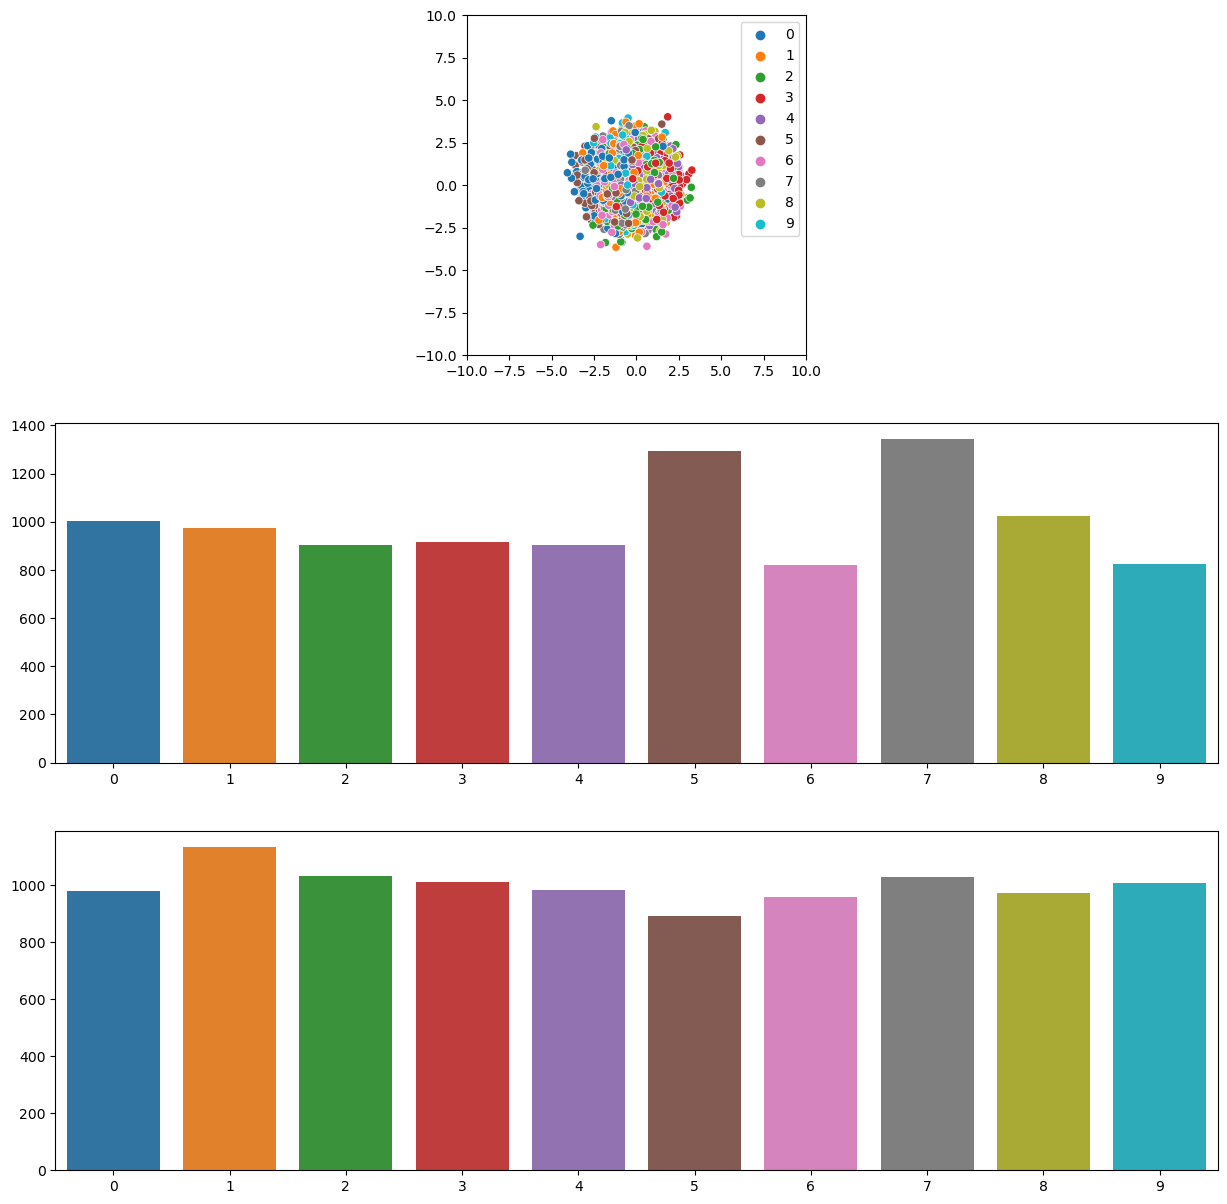

In [24]:
from collections import Counter

test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(311, aspect=1)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.set_xlim(-10, 10)
ax1.set_ylim(-10, 10)

with torch.no_grad():
    encoder.eval()
    decoder.eval()
    discriminator_l.eval()
    discriminator_s.eval()

    z_list = []
    label_list = []
    pred_list = []

    for img, label in test_loader:
        img = img.to(hp["device"])
        label_list.append(label)
        label = label.to(hp["device"])

        z, pred = encoder(img)
        z_list.append(z)
        cls_pred = torch.argmax(pred, dim=-1)
        pred_list.append(cls_pred)

    z_numpy = torch.cat(z_list, dim=0).detach().cpu().numpy()
    pred_numpy = torch.cat(pred_list, dim=0).detach().cpu().numpy()
    pred_counter = Counter(pred_numpy)
    keys = list(pred_counter.keys())
    keys.sort()
    values = [pred_counter[k] for k in keys]
    label_numpy = torch.cat(label_list, dim=0).numpy()

    sns.scatterplot(x=z_numpy[:, 0], y=z_numpy[:, 1], hue=label_numpy, palette="tab10", ax=ax1)

    label_counter = Counter(label_numpy)
    keys_l = list(label_counter.keys())
    keys_l.sort()
    values_l = [label_counter[k] for k in keys_l]

    sns.barplot(x=keys, y=values, ax=ax2)
    sns.barplot(x=keys_l, y=values_l, ax=ax3)


plt.show()